In [1]:
import os
import matplotlib.pyplot as plt
from OA_utils.OAPreprocessingScripts import *
from OA_utils.OpenSimScripts import *
from OA_utils.data_utils import interp_segments, ad2float
import pickle
from collections import Counter

In [2]:
root_dir = '/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/'
subjects = [f'Y{i}' for i in range(1, 23)]
bad_subjects = ['Y3']
for bs in bad_subjects:
    subjects.remove(bs)
speeds = ['80', '100', '120']
n_trials = 5
subject_trials = {}
trial_names = []
for subj in subjects:
    subj_dir = os.path.join(root_dir, subj, 'Walking/Files_W_HJCs/')
    output_dir = os.path.join(root_dir, 'transformed/')
    # Initialize nested dict
    subject_trials[subj] = {
        'static': {
            'input': os.path.join(subj_dir, f'{subj}_walking_static1.trc'),
            'output': os.path.join(output_dir, f'{subj}_walk_static1_transformed.trc')
        },
        'tracking': [],
        'forces': [],
        
    }
    # Populate tracking and force trial lists
    for spd in speeds:
        for i in range(1, n_trials + 1):
            trial_name = f'{subj}_{spd}_{i}'
            trial_names.append(str(trial_name))
            tracking_in = os.path.join(subj_dir, f'{trial_name}.trc')
            tracking_out = os.path.join(output_dir, f'{trial_name}_transformed.trc')
            force_in = os.path.join(subj_dir, f'{trial_name}.forces')
            force_out = os.path.join(output_dir, f'{trial_name}_transformed.mot')

            subject_trials[subj]['tracking'].append({'input': tracking_in, 'output': tracking_out})
            subject_trials[subj]['forces'].append({'input': force_in, 'output': force_out})

all_segs = {}
for subj, data in subject_trials.items():
    process_hjc_trc(input_path=data['static']['input'], 
                    output_path=data['static']['output'], 
                    markers_to_drop=[])
    for trc, forces in zip(data['tracking'], data['forces']):
        trial_segs = preprocess_trc_grf(trc_ip=trc['input'], 
                           trc_op=trc['output'],
                           markers_to_drop=[], 
                           grf_ip=forces['input'], 
                           grf_op=forces['output'],
                           grf_pickle_path='')
        for trial_name, seg_dict in trial_segs.items():
            subj_name = trial_name.split('_')[0]  
            if subj_name not in all_segs:
                all_segs[subj_name] = {}
            all_segs[subj_name][trial_name] = seg_dict
print(all_segs)

{'Y1': {'Y1_80_1': {'left': [(1.4935, 2.3385)], 'right': [(0.859, 1.675), (2.168, 3.064)]}, 'Y1_80_2': {'left': [(1.7495, 2.676)], 'right': [(1.0535, 1.939), (2.4895, 3.4355)]}, 'Y1_80_3': {'left': [(1.8275, 2.7055)], 'right': [(1.1395, 2.016), (2.5135, 3.3855)]}, 'Y1_80_4': {'left': [(1.85, 2.719)], 'right': [(1.1705, 2.0375), (2.518, 3.3595)]}, 'Y1_80_5': {'left': [(1.658, 2.5195)], 'right': [(1.01, 1.84), (2.3465, 3.1985)]}, 'Y1_100_1': {'left': [(1.467, 2.1545)], 'right': [(0.912, 1.6065), (2.0385, 2.647)]}, 'Y1_100_2': {'left': [(1.396, 2.075)], 'right': [(0.9215, 1.5135), (1.9435, 2.625)]}, 'Y1_100_3': {'left': [(1.4125, 2.1075)], 'right': [(0.8525, 1.5535), (1.9755, 2.6685)]}, 'Y1_100_4': {'left': [(1.496, 2.106)], 'right': [(0.9505, 1.623), (2.021, 2.5625)]}, 'Y1_100_5': {'left': [(1.4145, 2.104)], 'right': [(0.8645, 1.551), (1.967, 2.645)]}, 'Y1_120_1': {'left': [(0.8535, 1.4955)], 'right': [(1.385, 2.0235)]}, 'Y1_120_2': {'left': [(1.2575, 1.899)], 'right': [(0.732, 1.3695)]}

In [ ]:
subj_masses = [63, 85, 54, 60, 54, 83, 53, 62, 72, 65, 84, 83, 64, 59, 55, 73, 90, 75, 65, 68]
root_dir = '/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/'
for subj, data in subject_trials.items():
    scale_generic(root_dir= root_dir, mass=subj_masses[i], static_pose_filename=data['static']['output'])

[info] Processing subject Y1_scaled...
[info] Step 1: Loading generic model
[info] Updating Model file from 40000 to latest format...
[info] Loaded model RajagopalModifiedGeneric from file /Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Models/RajagopalModified_generic.osim
[warning] Couldn't find file 'r_pelvis.vtp'.
[warning] Couldn't find file 'l_pelvis.vtp'.
[warning] Couldn't find file 'sacrum.vtp'.
[warning] Couldn't find file 'r_femur.vtp'.
[warning] Couldn't find file 'r_tibia.vtp'.
[warning] Couldn't find file 'r_fibula.vtp'.
[warning] Couldn't find file 'r_patella.vtp'.
[warning] Couldn't find file 'r_talus.vtp'.
[warning] Couldn't find file 'r_foot.vtp'.
[warning] Couldn't find file 'r_bofoot.vtp'.
[warning] Couldn't find file 'l_femur.vtp'.
[warning] Couldn't find file 'l_tibia.vtp'.
[warning] Couldn't find file 'l_fibula.vtp'.
[warning] Couldn't find file 'l_patella.vtp'.
[warning] Couldn't find file 'l_talus.vtp'.
[warning] Couldn't find file 'l_foot.vtp'

In [7]:
parsed = parse_combined_scaling_output('/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Y_scaling_log.txt')
for subject, info in parsed.items():
    rms = info['marker_error_rms']
    max = info['marker_error_max']
    marker = info['marker_error_max_marker']
    print(f'{subject} had marker error rms {rms} and max marker error {max} at the {marker} marker')

Read scaling log
Y1 had marker error rms 0.0209464 and max marker error 0.0353988 at the R.ASIS marker
Y2 had marker error rms 0.017833 and max marker error 0.030939 at the L.ASIS marker
Y4 had marker error rms 0.0158646 and max marker error 0.024268 at the R.Knee marker
Y5 had marker error rms 0.0191026 and max marker error 0.0352803 at the R.Knee marker
Y6 had marker error rms 0.0131734 and max marker error 0.0220867 at the L.Knee marker
Y7 had marker error rms 0.0169768 and max marker error 0.0366843 at the L.Knee marker
Y8 had marker error rms 0.0178472 and max marker error 0.0292494 at the L.ASIS marker
Y9 had marker error rms 0.0164671 and max marker error 0.0326594 at the R.Knee marker
Y10 had marker error rms 0.0172277 and max marker error 0.0365453 at the L.Knee marker
Y11 had marker error rms 0.0159794 and max marker error 0.0285476 at the L.ASIS marker
Y12 had marker error rms 0.0222344 and max marker error 0.0397617 at the R.Heel marker
Y13 had marker error rms 0.0139774 an

In [8]:
ik_df = parse_full_ik_log('/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Y_ik_log.txt', trial_names)
abs_max_count, mean_max_count, mean_rms_count = 0, 0 ,0
problem_trials = []
for idx, row in ik_df.iterrows():
    trial = row['trial_name']
    mean_rms = row['mean_rms']
    std_rms = row['std_rms']
    max_rms = row['max_rms']
    mean_max = row['mean_max']
    std_max = row['std_max']
    max_error = row['max_marker_error']
    max_error_marker = row['max_marker_name']
    #print(f'{trial} had mean rms {mean_rms}, std rms {std_rms}, and max rms{max_rms}. The average max error was{mean_max}, with a standard deviation {std_max} and overall max {max_error} at the marker {max_error_marker}')
    if mean_rms > 0.03:
        #print(f'{trial} had mean RMS greater than 3 cm, it was {mean_rms}')
        mean_rms_count += 1
        problem_trials.append(trial)
    elif mean_max > 0.04:
        #print(f'{trial} had mean max error greater than 4 cm, it was {mean_max}')
        mean_max_count += 1
        problem_trials.append(trial)
    # elif max_error > 0.05:
    #     abs_max_count += 1
    #     print(f'{trial} had max_error greater than 6 cm, it was {max_error} at the {max_error_marker} marker')
    #     problem_trials.append(trial)
print(f'{mean_rms_count} trials with Mean RMS > 3 cm')
print(f'{mean_max_count} trials with Mean max error > 4 cm')
print(f'{abs_max_count} trials with overall max error > 6 cm')




Read inverse kinematics log
14 trials with Mean RMS > 3 cm
3 trials with Mean max error > 4 cm
0 trials with overall max error > 6 cm


In [9]:
root_dir = '/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/'
os.chdir(root_dir)
for subj, data in subject_trials.items():
    model = osim.Model(f'Results/Scaling/{subj}_scaled.osim')
    for trc, forces in zip(data['tracking'], data['forces']):
        inverse_dynamics(root_dir=root_dir, force_data_filepath=forces['output'], tracking_data_filepath=trc['output'], model=model)

[info] Loaded model Y1_scaled from file Results/Scaling/Y1_scaled.osim
[warning] Couldn't find file 'r_pelvis.vtp'.
[warning] Couldn't find file 'l_pelvis.vtp'.
[warning] Couldn't find file 'sacrum.vtp'.
[warning] Couldn't find file 'r_femur.vtp'.
[warning] Couldn't find file 'r_tibia.vtp'.
[warning] Couldn't find file 'r_fibula.vtp'.
[warning] Couldn't find file 'r_patella.vtp'.
[warning] Couldn't find file 'r_talus.vtp'.
[warning] Couldn't find file 'r_foot.vtp'.
[warning] Couldn't find file 'r_bofoot.vtp'.
[warning] Couldn't find file 'l_femur.vtp'.
[warning] Couldn't find file 'l_tibia.vtp'.
[warning] Couldn't find file 'l_fibula.vtp'.
[warning] Couldn't find file 'l_patella.vtp'.
[warning] Couldn't find file 'l_talus.vtp'.
[warning] Couldn't find file 'l_foot.vtp'.
[warning] Couldn't find file 'l_bofoot.vtp'.
[warning] Couldn't find file 'hat_spine.vtp'.
[warning] Couldn't find file 'hat_jaw.vtp'.
[warning] Couldn't find file 'hat_skull.vtp'.
[warning] Couldn't find file 'hat_ribs

In [10]:
left = 0
right = 0
for subjects, trials in all_segs.items():
    for trial_data in trials.values():
        left += len(trial_data['left'])
        right += len(trial_data['right'])
print(f'{left} total left foot segments')
print(f'{right} total right foot segments')

331 total left foot segments
494 total right foot segments


In [11]:
#initialize arrays to store compiled segments
grf_x_segs = []
grf_y_segs = []
grf_z_segs = []

tibpost_segments = []
tibant_segments = []
edl_segments = []
ehl_segments = []
fdl_segments = []
fhl_segments = []
gaslat_segments = []
gasmed_segments = []
soleus_segments = []
perbrev_segments = []
perlong_segments = []
achilles_segments = []

compiled_segs = {}
problematic_segs = []

#loop thru subjects
    
for subjects, trials in all_segs.items():
    subject = subjects
    if subject not in compiled_segs:
        compiled_segs[subject] = {
        'grf_x': [], 'grf_y': [], 'grf_z': [],
        'tibpost': [], 'tibant': [], 'edl': [], 'ehl': [],
        'fdl': [], 'fhl': [], 'gaslat': [], 'gasmed': [],
        'soleus': [], 'perbrev': [], 'perlong': [], 'achilles': []
        }
    for trial_name, seg_dict in trials.items():
        if trial_name in problem_trials:
            continue
        grf_path = os.path.join('/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/transformed/grf_pickles', trial_name)
        grf_df = pd.read_pickle(grf_path)
        muscle_path = os.path.join(f'/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Results/SO/{trial_name}/results_forces.sto')
        muscle_storage = osim.Storage(muscle_path)

        time = grf_df['time'].values
        muscle_time_col = osim.ArrayDouble()
        tibpost_r_col = osim.ArrayDouble()
        tibant_r_col = osim.ArrayDouble()
        edl_r_col = osim.ArrayDouble()
        ehl_r_col = osim.ArrayDouble()
        fdl_r_col = osim.ArrayDouble()
        fhl_r_col = osim.ArrayDouble()
        gaslat_r_col = osim.ArrayDouble()
        gasmed_r_col = osim.ArrayDouble()
        soleus_r_col = osim.ArrayDouble()
        perbrev_r_col = osim.ArrayDouble()
        perlong_r_col = osim.ArrayDouble()
            
        tibpost_l_col = osim.ArrayDouble()
        tibant_l_col = osim.ArrayDouble()
        edl_l_col = osim.ArrayDouble()
        ehl_l_col = osim.ArrayDouble()
        fdl_l_col = osim.ArrayDouble()
        fhl_l_col = osim.ArrayDouble()
        gaslat_l_col = osim.ArrayDouble()
        gasmed_l_col = osim.ArrayDouble()
        soleus_l_col = osim.ArrayDouble()
        perbrev_l_col = osim.ArrayDouble()
        perlong_l_col = osim.ArrayDouble()

        muscle_storage.getTimeColumn(muscle_time_col)
        muscle_storage.getDataColumn('tibpost_r', tibpost_r_col)
        muscle_storage.getDataColumn('tibant_r', tibant_r_col)
        muscle_storage.getDataColumn('edl_r', edl_r_col)
        muscle_storage.getDataColumn('ehl_r', ehl_r_col)
        muscle_storage.getDataColumn('fdl_r', fdl_r_col)
        muscle_storage.getDataColumn('fhl_r', fhl_r_col)
        muscle_storage.getDataColumn('gaslat_r', gaslat_r_col)
        muscle_storage.getDataColumn('gasmed_r', gasmed_r_col)
        muscle_storage.getDataColumn('soleus_r', soleus_r_col)
        muscle_storage.getDataColumn('perbrev_r', perbrev_r_col)
        muscle_storage.getDataColumn('perlong_r', perlong_r_col)
            
        muscle_storage.getDataColumn('tibpost_l', tibpost_l_col)
        muscle_storage.getDataColumn('tibant_l', tibant_l_col)
        muscle_storage.getDataColumn('edl_l', edl_l_col)
        muscle_storage.getDataColumn('ehl_l', ehl_l_col)
        muscle_storage.getDataColumn('fdl_l', fdl_l_col)
        muscle_storage.getDataColumn('fhl_l', fhl_l_col)
        muscle_storage.getDataColumn('gaslat_l', gaslat_l_col)
        muscle_storage.getDataColumn('gasmed_l', gasmed_l_col)
        muscle_storage.getDataColumn('soleus_l', soleus_l_col)
        muscle_storage.getDataColumn('perbrev_l', perbrev_l_col)
        muscle_storage.getDataColumn('perlong_l', perlong_l_col)
        muscle_time = ad2float(muscle_time_col)
        tibpost_r = ad2float(tibpost_r_col)
        tibant_r = ad2float(tibant_r_col)
        edl_r = ad2float(edl_r_col)
        ehl_r = ad2float(ehl_r_col)
        fdl_r = ad2float(fdl_r_col)
        fhl_r = ad2float(fhl_r_col)
        gaslat_r = ad2float(gaslat_r_col)
        gasmed_r = ad2float(gasmed_r_col)
        soleus_r = ad2float(soleus_r_col)
        perbrev_r = ad2float(perbrev_r_col)
        perlong_r = ad2float(perlong_r_col)
            
        tibpost_l = ad2float(tibpost_l_col)
        tibant_l = ad2float(tibant_l_col)
        edl_l = ad2float(edl_l_col)
        ehl_l = ad2float(ehl_l_col)
        fdl_l = ad2float(fdl_l_col)
        fhl_l = ad2float(fhl_l_col)
        gaslat_l = ad2float(gaslat_l_col)
        gasmed_l = ad2float(gasmed_l_col)
        soleus_l = ad2float(soleus_l_col)
        perbrev_l = ad2float(perbrev_l_col)
        perlong_l = ad2float(perlong_l_col)

        for side, seg_list in seg_dict.items():
            for (s, e) in seg_list:
                grf_mask = (time >= s) & (time <= e)
                muscle_mask = (muscle_time >= s) & (muscle_time <= e)
                if (not muscle_mask.any()) or (not grf_mask.any()):
                    continue
                if side == 'right':
                    seg_y = grf_df.loc[grf_mask, 'ground_force_vy']
                    seg_x = grf_df.loc[grf_mask, 'ground_force_vx']
                    seg_z = grf_df.loc[grf_mask, 'ground_force_vz']
                    seg_tibpost = tibpost_r[muscle_mask]
                    seg_tibant = tibant_r[muscle_mask]
                    seg_edl = edl_r[muscle_mask]
                    seg_ehl = ehl_r[muscle_mask]
                    seg_fdl = fdl_r[muscle_mask]
                    seg_fhl = fhl_r[muscle_mask]
                    seg_gaslat = gaslat_r[muscle_mask]
                    seg_gasmed = gasmed_r[muscle_mask]
                    seg_soleus = soleus_r[muscle_mask]
                    seg_perbrev = perbrev_r[muscle_mask]
                    seg_perlong = perlong_r[muscle_mask]
                    seg_achilles = np.sum(np.array([seg_gaslat, seg_gasmed, seg_soleus]), axis=0)
                else:
                    seg_x = grf_df.loc[grf_mask, '1_ground_force_vx']
                    seg_y = grf_df.loc[grf_mask, '1_ground_force_vy']
                    seg_z = -1 * grf_df.loc[grf_mask, '1_ground_force_vz']
                    seg_tibpost = tibpost_l[muscle_mask]
                    seg_tibant = tibant_l[muscle_mask]
                    seg_edl = edl_l[muscle_mask]
                    seg_ehl = ehl_l[muscle_mask]
                    seg_fdl = fdl_l[muscle_mask]
                    seg_fhl = fhl_l[muscle_mask]
                    seg_gaslat = gaslat_l[muscle_mask]
                    seg_gasmed = gasmed_l[muscle_mask]
                    seg_soleus = soleus_l[muscle_mask]
                    seg_perbrev = perbrev_l[muscle_mask]
                    seg_perlong = perlong_l[muscle_mask]
                    seg_achilles = np.sum(np.array([seg_gaslat, seg_gasmed, seg_soleus]), axis=0)

                #filter out missteps based on y grfs
                # y_idx_25 = int(len(seg_y) * 0.25)
                # y_idx_75 = int(len(seg_y) * 0.75)
                # y_idx_10 = int(len(seg_y) * 0.1)
                # y_idx_1 = int(len(seg_y) * 0.01)
                # if len(seg_y) > 0 and seg_y.iloc[y_idx_25] < 500 or seg_y.iloc[y_idx_75] < 400 or seg_y.iloc[y_idx_1] > 300:
                #     problematic_segs.append({
                #         'subject': trial_name,
                #         'side': side,
                #         'file':grf_path,
                #         'start_time': s,
                #         'end_time':float(e)
                #     })
                #     continue

                
                subj_data = compiled_segs[subject]
                subj_data['grf_x'].append(seg_x)
                subj_data['grf_y'].append(seg_y)
                subj_data['grf_z'].append(seg_z)
                subj_data['tibpost'].append(seg_tibpost)
                subj_data['tibant'].append(seg_tibant)
                subj_data['edl'].append(seg_edl)
                subj_data['ehl'].append(seg_ehl)
                subj_data['fdl'].append(seg_fdl)
                subj_data['fhl'].append(seg_fhl)
                subj_data['gaslat'].append(seg_gaslat)
                subj_data['gasmed'].append(seg_gasmed)
                subj_data['soleus'].append(seg_soleus)
                subj_data['perbrev'].append(seg_perbrev)
                subj_data['perlong'].append(seg_perlong)
                subj_data['achilles'].append(seg_achilles)

num_x_segments = sum(len(data['grf_x']) for data in compiled_segs.values())
num_y_segments = sum(len(data['grf_y']) for data in compiled_segs.values())
num_z_segments = sum(len(data['grf_z']) for data in compiled_segs.values())

print(f"Number of segments (x, y, z): {num_x_segments}, {num_y_segments}, {num_z_segments}")


[info] Storage: read data file = /Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Results/SO/Y1_80_1/results_forces.sto (nr=291 nc=118)
[info] Storage: read data file = /Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Results/SO/Y1_80_2/results_forces.sto (nr=291 nc=118)
[info] Storage: read data file = /Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Results/SO/Y1_80_3/results_forces.sto (nr=291 nc=118)
[info] Storage: read data file = /Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Results/SO/Y1_80_4/results_forces.sto (nr=291 nc=118)
[info] Storage: read data file = /Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Results/SO/Y1_80_5/results_forces.sto (nr=291 nc=118)
[info] Storage: read data file = /Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Results/SO/Y1_100_1/results_forces.sto (nr=291 nc=118)
[info] Storage: read data file = /Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Wa

In [12]:
all_subj_segs = {}
keys = next(iter(compiled_segs.values())).keys()
for key in keys:
   all_subj_segs[f'{key}_segments'] = [seg for subj_data in compiled_segs.values() for seg in subj_data.get(key, [])]

n_interp_points = 100
resampled_segs = {}

for subj, subj_data in compiled_segs.items():
    resampled_segs[subj] = {}
    for key, seg_list in subj_data.items():
        if len(seg_list) == 0:
            resampled_segs[subj][key] = []
            continue 
        resampled, time_resampled = interp_segments(seg_list, n_interp_points)
        resampled_segs[subj][key] = resampled
resampled_segs['time_resampled'] = time_resampled

def get_all_segments(resampled_segs, key):
    """
    Collects all resampled segments for a given signal across all subjects.
    """
    all_segs = []
    for subj, data in resampled_segs.items():
        if subj == "time_resampled":
            continue
        if key in data:
            all_segs.extend(data[key])
    return np.array(all_segs)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, -200.0, '−200'),
  Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200')])

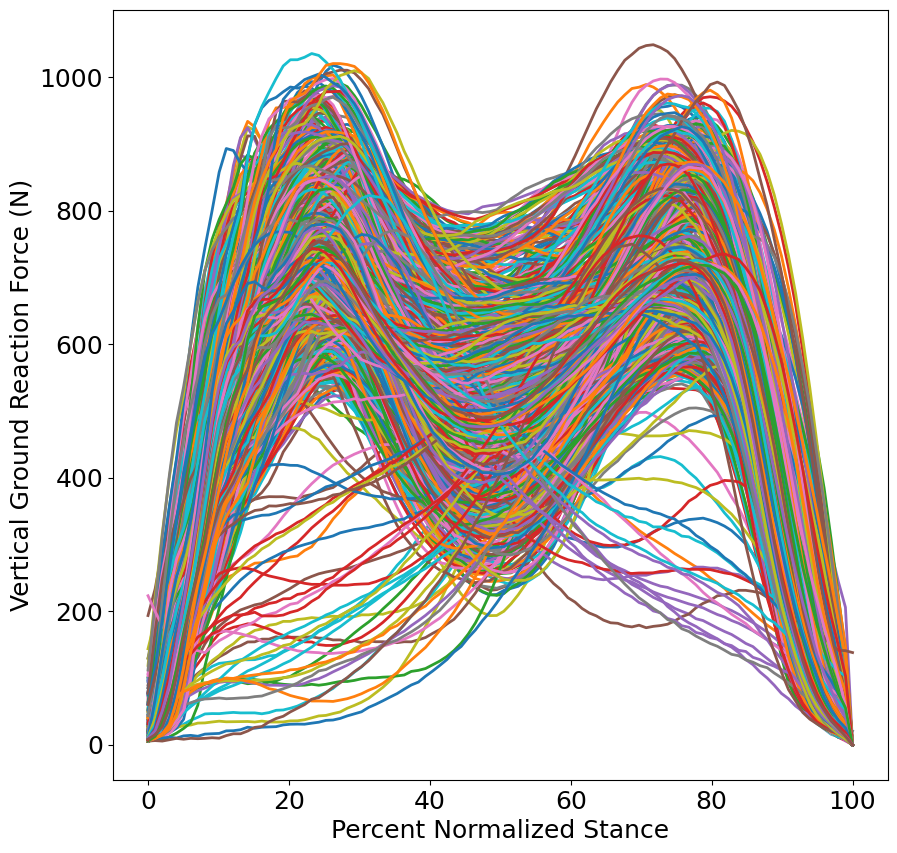

In [14]:
grf_y_resampled = get_all_segments(resampled_segs, 'grf_y')
time_resampled = resampled_segs['time_resampled']
figure = plt.figure(figsize=(10, 10))

num_grf_segments = len(grf_y_resampled)

for i in range(num_grf_segments):
    plt.plot(time_resampled[0] * 100, grf_y_resampled[i], linewidth=2)

plt.ylabel("Vertical Ground Reaction Force (N)", fontsize=18)
plt.xlabel("Percent Normalized Stance", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.xlim([0, 1])
# plt.ylim([0, 1200])

In [15]:
tibpost_resampled = get_all_segments(resampled_segs, 'tibpost')
tibant_resampled = get_all_segments(resampled_segs, 'tibant')
edl_resampled = get_all_segments(resampled_segs, 'edl')
ehl_resampled = get_all_segments(resampled_segs, 'ehl')
fdl_resampled = get_all_segments(resampled_segs, 'fdl')
fhl_resampled = get_all_segments(resampled_segs, 'fhl')
gaslat_resampled = get_all_segments(resampled_segs, 'gaslat')
gasmed_resampled = get_all_segments(resampled_segs, 'gasmed')
soleus_resampled = get_all_segments(resampled_segs, 'soleus')
perbrev_resampled = get_all_segments(resampled_segs, 'perbrev')
perlong_resampled = get_all_segments(resampled_segs, 'perlong')
achilles_resampled = get_all_segments(resampled_segs, 'achilles')

time_resampled = resampled_segs['time_resampled']

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 [Text(0, -2000.0, '−2000'),
  Text(0, 0.0, '0'),
  Text(0, 2000.0, '2000'),
  Text(0, 4000.0, '4000'),
  Text(0, 6000.0, '6000'),
  Text(0, 8000.0, '8000'),
  Text(0, 10000.0, '10000')])

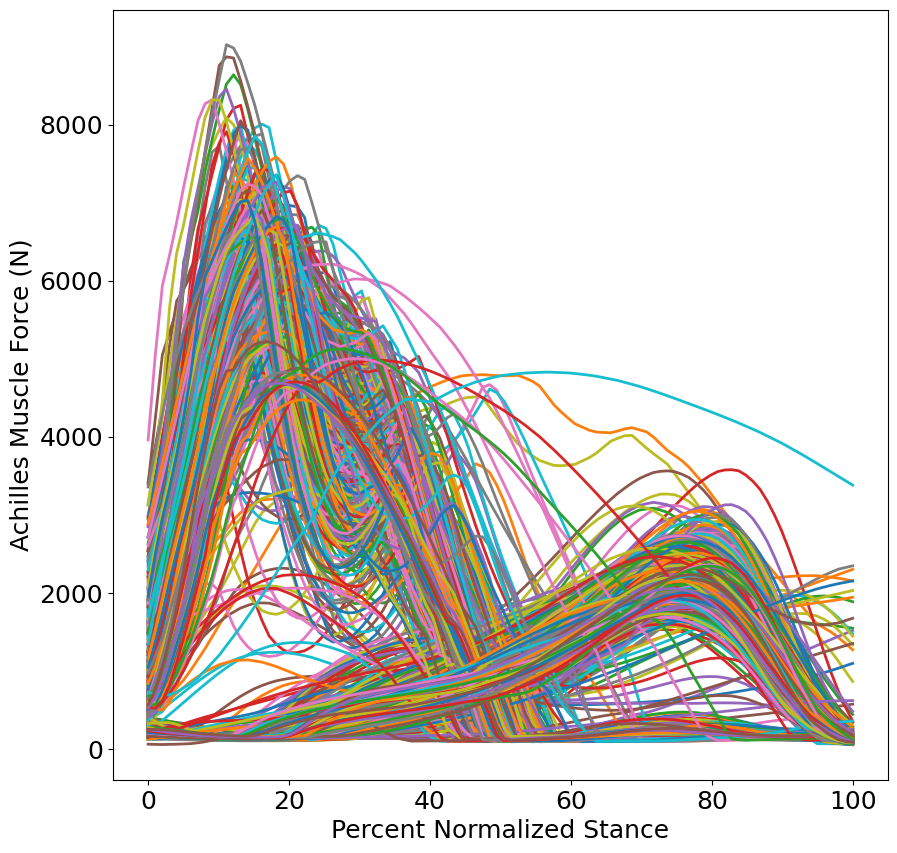

In [17]:
figure = plt.figure(figsize=(10, 10))

num_achilles_segments = len(achilles_resampled)

for i in range(num_achilles_segments):
    plt.plot(time_resampled[0]*100, achilles_resampled[i], linewidth=2)

plt.ylabel("Achilles Muscle Force (N)", fontsize=18)
plt.xlabel("Percent Normalized Stance", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

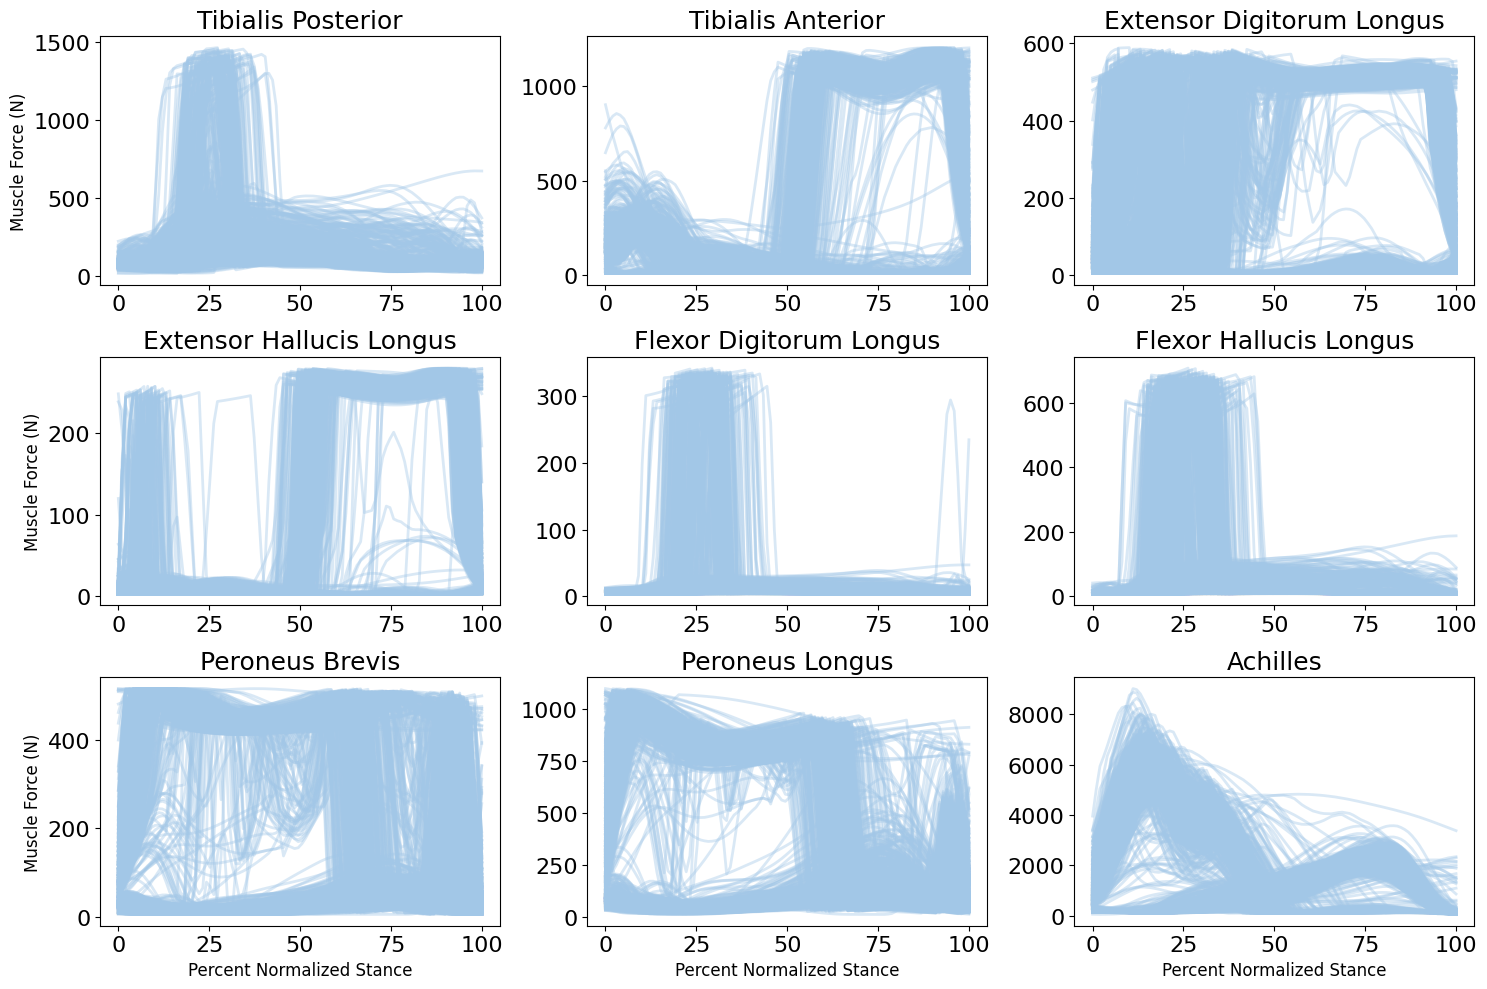

In [18]:
muscle_titles = ['Tibialis Posterior', 'Tibialis Anterior', 'Extensor Digitorum Longus', 'Extensor Hallucis Longus', 
                 'Flexor Digitorum Longus', 'Flexor Hallucis Longus', 'Peroneus Brevis', 'Peroneus Longus', 'Achilles']

perc_stance = np.linspace(0, 100, 100)

muscle_forces = [tibpost_resampled, tibant_resampled, edl_resampled, ehl_resampled, fdl_resampled, fhl_resampled,
                 perbrev_resampled, perlong_resampled, achilles_resampled]

fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # Create subplots for 9 muscles
axes = axes.flatten()

for i, ax in enumerate(axes):
    for j in range(num_achilles_segments):
        ax.plot(time_resampled[0]*100, muscle_forces[i][j], linewidth=2, color="#A2C7E7", alpha=0.4)
    
    mean_force = ()
    
    if i >= 6:
        ax.set_xlabel('Percent Normalized Stance', fontsize=12)
        
    if i % 3 == 0:
        ax.set_ylabel('Muscle Force (N)', fontsize=12)
        
    ax.set_title(muscle_titles[i], fontsize=18)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)

plt.tight_layout()
plt.show()